# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('spam.csv',encoding = "latin-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop([data.columns[col] for col in range(2,5)],axis=1,inplace=True)

In [5]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:xlabel='v1', ylabel='count'>

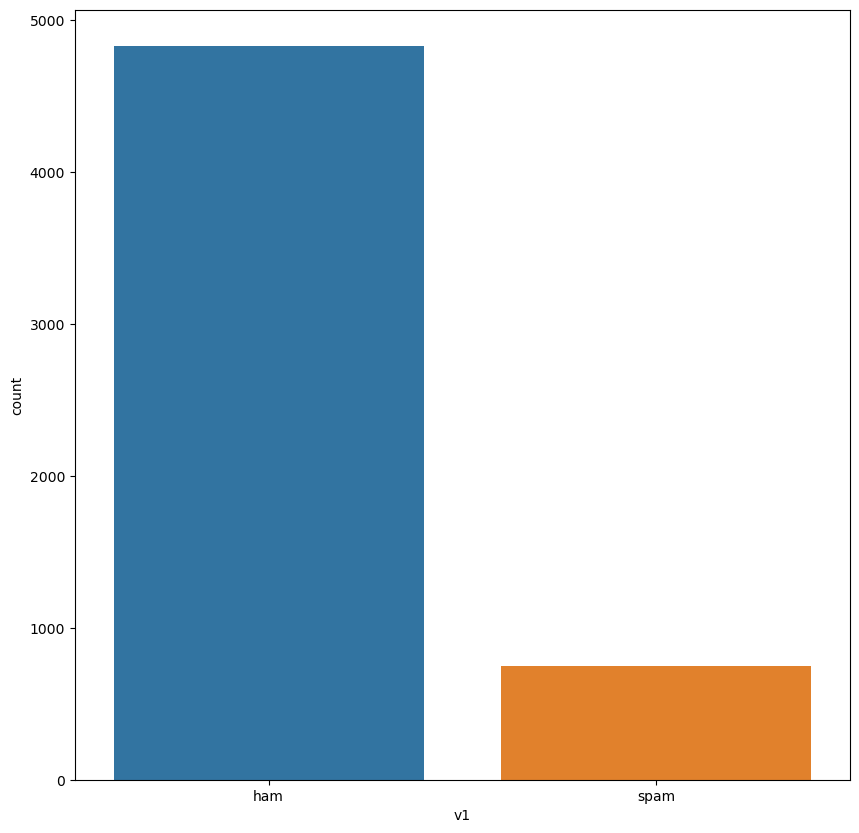

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(data = data, x= 'v1' )

### Apply label encoding to transform data to machine-readable form

In [7]:
encoder = LabelEncoder()
data['v1'] = encoder.fit_transform(data["v1"])

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [9]:
y = data['v1']

In [10]:
data = data.drop('v1',axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.8)

In [12]:
X_tr_f = vect.fit_transform(X_train['v2'])
X_te_f = vect.transform(X_test['v2'])

In [13]:
print(X_tr_f)

  (0, 5639)	0.27353822325062405
  (0, 3120)	0.18383757352930244
  (0, 7402)	0.23274624808121022
  (0, 1004)	0.36967542601179026
  (0, 3157)	0.38772616258115633
  (0, 7153)	0.22133036596686975
  (0, 1957)	0.38772616258115633
  (0, 1697)	0.3043961612331659
  (0, 6975)	0.3118331742209442
  (0, 5070)	0.24718094226011156
  (0, 4936)	0.31607624942920065
  (1, 3726)	0.4668107156795991
  (1, 4122)	0.26894422054259776
  (1, 6725)	0.3045953945917086
  (1, 2963)	0.3680541681809128
  (1, 3280)	0.34856099218505804
  (1, 7439)	0.5216975841801637
  (1, 3398)	0.2963973721697976
  (2, 3217)	0.454870724281979
  (2, 6626)	0.5809785913557348
  (2, 914)	0.5250881312016003
  (2, 4084)	0.42407423294596075
  (3, 2635)	0.5845433814983031
  (3, 2235)	0.6736712037462638
  (3, 3102)	0.452190385114046
  :	:
  (4452, 3992)	0.30743995117740197
  (4452, 3217)	0.2857126143779914
  (4453, 767)	0.5927554660296521
  (4453, 2791)	0.8053824914237768
  (4454, 3807)	0.49369908912501453
  (4454, 2591)	0.46332831521790563
  (4

In [14]:
Log = LogisticRegression()
Log.fit(X_tr_f,y_train)

LogisticRegression()

In [15]:
sv = SVC()
sv.fit(X_tr_f,y_train)

SVC()

In [16]:
nn = MLPClassifier(hidden_layer_sizes=(128,128))
nn.fit(X_tr_f,y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [17]:
log_pre = Log.predict(X_te_f)
sv_pre = sv.predict(X_te_f)
nn_pre = nn.predict(X_te_f)

#### Calculating accuracy

In [18]:
print(f'accuracy of Logistic Regression : {Log.score(X_te_f,y_test)} ')
print(f'accuracy of SVM : {sv.score(X_te_f,y_test)} ')
print(f'accuracy of Neural Network : {nn.score(X_te_f,y_test)} ')

accuracy of Logistic Regression : 0.9587443946188341 
accuracy of SVM : 0.9775784753363229 
accuracy of Neural Network : 0.9838565022421525 


#### Calculating F1 Score

In [19]:
print(f'F1 score of Logistic Regression : {f1_score(y_test,log_pre)} ')
print(f'F1 score of SVM : {f1_score(y_test,sv_pre)} ')
print(f'F1 score of Neural Network : {f1_score(y_test,nn_pre)} ')

F1 score of Logistic Regression : 0.8270676691729324 
F1 score of SVM : 0.9128919860627178 
F1 score of Neural Network : 0.9387755102040817 
